In [69]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## PART 1

In [70]:
a1 = pd.Series(['T', 'T', 'T', 'F', 'F', 'F', 'F', 'T', 'F'])
a2 = pd.Series(['T', 'T', 'F', 'F', 'T', 'T', 'F', 'F', 'T'])
a3 = pd.Series([5, 7, 8, 3, 7, 4, 5, 6, 1])
Class = pd.Series(['Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N'])

data = pd.DataFrame({'a1':a1, 'a2':a2, 'a3':a3, 'Class':Class})
data

,a1,a2,a3,Class
0,T,T,5,Y
1,T,T,7,Y
2,T,F,8,N
3,F,F,3,Y
4,F,T,7,N
5,F,T,4,N
6,F,F,5,N
7,T,F,6,Y
8,F,T,1,N


In [71]:
data['Class'] = data['Class'].map(lambda x : True if x == 'Y' else False)

for col in ['a1', 'a2']:
    data[col] = data[col].map(lambda x : True if x == 'T' else False)
data

,a1,a2,a3,Class
0,True,True,5,True
1,True,True,7,True
2,True,False,8,False
3,False,False,3,True
4,False,True,7,False
5,False,True,4,False
6,False,False,5,False
7,True,False,6,True
8,False,True,1,False


In [72]:
to_predict = pd.DataFrame({'a1':[True], 'a2':[False], 'a3':[1]})
to_predict

,a1,a2,a3
0,True,False,1


In [73]:
clf = GaussianNB()
clf.fit(data.drop('Class', axis=True), data['Class'])

clf.predict(to_predict)

array([False])

In [74]:
n = data.shape[0]
n1 = np.count_nonzero(data['Class'])
n2 = n - n1

print(n, n1, n2)

9 4 5


In [75]:
p1 = n1 / n
p2 = n2 / n

print(p1, p2)

0.4444444444444444 0.5555555555555556


In [76]:
m1 = np.mean(data[data['Class']==True].drop('Class', axis=True), axis=0)
m2 = np.mean(data[data['Class']==False].drop('Class', axis=True), axis=0)

print(m1)
print(m2)

a1    0.75
a2    0.50
a3    5.25
dtype: float64
a1    0.2
a2    0.6
a3    5.0
dtype: float64


In [77]:
cov1 = data[data['Class']==True].drop('Class', axis=True).cov()
cov2 = data[data['Class']==False].drop('Class', axis=True).cov()

print(cov1)
print(cov2)

          a1        a2        a3
a1  0.250000  0.166667  0.750000
a2  0.166667  0.333333  0.500000
a3  0.750000  0.500000  2.916667
      a1    a2    a3
a1  0.20 -0.15  0.75
a2 -0.15  0.30 -0.75
a3  0.75 -0.75  7.50


In [78]:
# Какая вероятность меньше, та
print(stats.multivariate_normal.pdf(to_predict, m1, cov1) * p1)
print(stats.multivariate_normal.pdf(to_predict, m2, cov2) * p2)

3.4247331186367196e-10
7.48983846562541e-05


## PART 2

In [79]:
m1 = [1, 3]
m2 = [5, 5]

cov1 = [[5, 3], [3, 2]]
cov2 = [[2, 0], [0, 1]]

p1 = p2 = 0.5

to_predict = [3, 4]

In [80]:
print(stats.multivariate_normal.pdf(to_predict, m1, cov1)  * p1)
print(stats.multivariate_normal.pdf(to_predict, m2, cov2)  * p2)

0.048266176315027005
0.012555482738023718


## PART 3

In [81]:
age =  pd.Series([25, 20, 25, 45, 20, 25])
car = pd.Series(['Sports', 'Vintage', 'Sports', 'SUV', 'Sports', 'SUV'])
risk = pd.Series(['L', 'H', 'L', 'H', 'H', 'H'])

data = pd.DataFrame({'Age':age, 'Car':car, 'Risk':risk})
data

,Age,Car,Risk
0,25,Sports,L
1,20,Vintage,H
2,25,Sports,L
3,45,SUV,H
4,20,Sports,H
5,25,SUV,H


In [82]:
df = data.join(pd.get_dummies(data['Car']))
df.drop('Car', axis=True, inplace=True)
df.head()

,Age,Risk,SUV,Sports,Vintage
0,25,L,0,1,0
1,20,H,0,0,1
2,25,L,0,1,0
3,45,H,1,0,0
4,20,H,0,1,0


In [83]:
df['Risk'] = df['Risk'] == 'H'
df

,Age,Risk,SUV,Sports,Vintage
0,25,False,0,1,0
1,20,True,0,0,1
2,25,False,0,1,0
3,45,True,1,0,0
4,20,True,0,1,0
5,25,True,1,0,0


In [98]:
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(df.drop('Risk', axis=True), df['Risk'])

DecisionTreeClassifier(criterion='entropy')

[Text(133.92000000000002, 181.2, 'Sports <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]\nclass = H'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = H'),
 Text(200.88000000000002, 108.72, 'Age <= 22.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = L'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = H'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = L')]

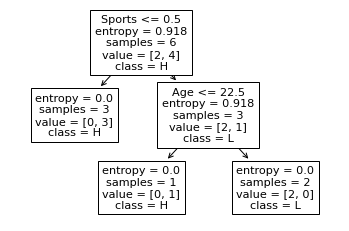

In [99]:
tree.plot_tree(clf, feature_names=df.columns.drop('Risk'), class_names=['L', 'H'])

In [100]:
# TRUE == 'H'
clf.predict([[27, 0, 0, 1]])

array([ True])